# Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II
__Objective:__ Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

%matplotlib inline

dataset = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(dataset)

df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [26]:
df.shape

(2443651, 9)

## Part 1: Analyzing Best-Seller Trends Across Product Categories

__Objective:__ Understand the relationship between product categories and their best-seller status.

1. __Crosstab Analysis:__
   * Create a crosstab between the product category and the _isBestSeller_ status.
   * Are there categories where being a best-seller is more prevalent?
   * Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [34]:
# 1. Creating a crosstab between 'category' and 'isBestSeller'
# This crosstab shows the counts of best-sellers and non-best-sellers across different product categories.
crosstab_category_bestseller = pd.crosstab(df['category'], df['isBestSeller'])

# Display the crosstab
display(crosstab_category_bestseller)

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [36]:
# 2. Calculate the Proportion of Best-Sellers
# Adding a column to calculate the proportion of best-sellers
crosstab_category_bestseller['Total'] = crosstab_category_bestseller.sum(axis=1)
crosstab_category_bestseller['BestSeller_Proportion'] = crosstab_category_bestseller[True] / crosstab_category_bestseller['Total']

# Display the updated crosstab with the proportion of best-sellers
crosstab_category_bestseller

isBestSeller,False,True,Total,BestSeller_Proportion
category,,,,
3D Printers,247,1,248,0.004032
3D Printing & Scanning,4065,2,4067,0.000492
Abrasive & Finishing Products,245,5,250,0.020000
Action Cameras,1696,1,1697,0.000589
Adapters,251,3,254,0.011811
...,...,...,...,...
Wind Instruments,243,7,250,0.028000
Window Treatments,234,5,239,0.020921
Women,17559,213,17772,0.011985


In [38]:
# 3. Sort categories by the proportion of best-sellers in descending order
crosstab_sorted = crosstab_category_bestseller.sort_values(by='BestSeller_Proportion', ascending=False)

# Display the sorted table
crosstab_sorted[['BestSeller_Proportion']]

isBestSeller,BestSeller_Proportion
category,
Grocery,0.058135
Smart Home Security & Lighting,0.057692
Health & Personal Care,0.057686
Mobile Phone Accessories,0.042471
Power & Hand Tools,0.035339
...,...
Projectors,0.000000
Printer Accessories,0.000000
Power Supplies,0.000000


__Categories where being a Best-Seller is more prevalent:__

- __Grocery:__ This category has the highest proportion of best-sellers, with 5.8% of products being best-sellers.

- __Smart Home Security & Lighting:__ This category follows closely behind, with 5.77% of products being best-sellers.

- __Health & Personal Care:__ Another popular category, with 5.78% of products being best-sellers. Health-related products are essential and are often repeat purchases, which may explain why this category has a high proportion of best-sellers.

- __Mobile Phone Accessories and Power & Hand Tools:__ These categories also show a moderate prevalence of best-sellers, with around 4.24% and 3.53%, respectively.

2. __Statistical Tests:__

* Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
* Compute Cramér's V to understand the strength of association between best-seller status and category.

_Null Hypothesis (H0)_ : The product category and best-seller status are independent. This means that the likelihood of a product being a best-seller is not influenced by its product category. In other words, the proportion of best-sellers is the same across all product categories.

_Alternative Hypothesus (H1)_: The product category and best-seller status are not independent. This means that the likelihood of a product being a best-seller depends on its product category.  In other words, certain categories may have a higher or lower proportion of best-sellers than others.


In [43]:
# 1. Chi-square Test of Independence

# Import necessary libraries
from scipy.stats import chi2_contingency

# Create a crosstab for category and isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab)

# Print the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"p-value: {p_value}")

Chi-square statistic: 36540.20270061387
p-value: 0.0


__Interpretation of the Chi-square Test Results:__
- __Chi-square statistic: 36540.20__: The large Chi-square statistic suggests a significant difference between the observed and expected counts in the crosstab. This means the observed distribution of best-sellers across product categories is far from what we would expect if they were independent of each other.

- __p-value: 0.0__: The p-value of 0.0 (or effectively very close to 0) is much smaller than the typical threshold of 0.05. This indicates that the difference between product categories and best-seller status is statistically significant.

__Conclusion:__
__Reject the null hypothesis:__ Given the extremely low p-value, we reject the null hypothesis. This means that product category and best-seller status are dependent—there is a statistically significant association between the two variables.

In [51]:
# 2. Calculate Cramér's V (measures the strength of association between two categorical variables)

from scipy.stats.contingency import association

# Calculate Cramér's V using the crosstab from the chi-square test
cramers_v = association(crosstab, method='cramer')

# Print the result
print(f"Cramér's V: {cramers_v}")


# Interpretation of Cramér's V:
# 0 to 0.1: Very weak or no association.
# 0.1 to 0.3: Weak to moderate association.
# 0.3 to 0.5: Moderate to strong association.
# 0.5 and above: Strong association.

Cramér's V: 0.1222829439760564


__Interpretation of Cramér's V:__
- __Cramér's V = 0.122__ falls into the range of 0.1 to 0.3, which indicates a _weak to moderate_ association between product category and best-seller status. This means, while we have already established that there is a statistically significant relationship between product category and best-seller status (from the Chi-square test), the strength of this association is relatively weak.
In practical terms, while product category does influence whether a product becomes a best-seller, it is not the dominant factor. There may be other factors (such as price, reviews, product quality, or market trends) that have a stronger influence on whether a product achieves best-seller status.

<br>
<br>

3. __Visualizations:__
   * Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [57]:
# a Stacked bar chart is a great way to show the proportion of best-sellers and non-best-sellers within each category. 

# 1. Create a crosstab for the product category and isBestSeller status
# table where the values represent the proportion of best-sellers (True) and non-best-sellers (False) within each category.
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index') 


# Display the crosstab (normalized)
crosstab.head()

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811


In [63]:
# I'll consider only the top 20 categories

# Filter crosstab to include only categories with at least one best-seller
crosstab_filtered = crosstab[crosstab[True] > 0]

# Sort categories by the proportion of best-sellers
crosstab_sorted = crosstab_filtered.sort_values(by=True, ascending=False)

# Display the top 20 categories with the highest proportion of best-sellers
crosstab_top = crosstab_sorted.head(20)

crosstab_top

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
"Billiard, Snooker & Pool",0.967871,0.032129
Pet Supplies,0.969800,0.030200
Home Brewing & Wine Making,0.971545,0.028455
Wind Instruments,0.972000,0.028000


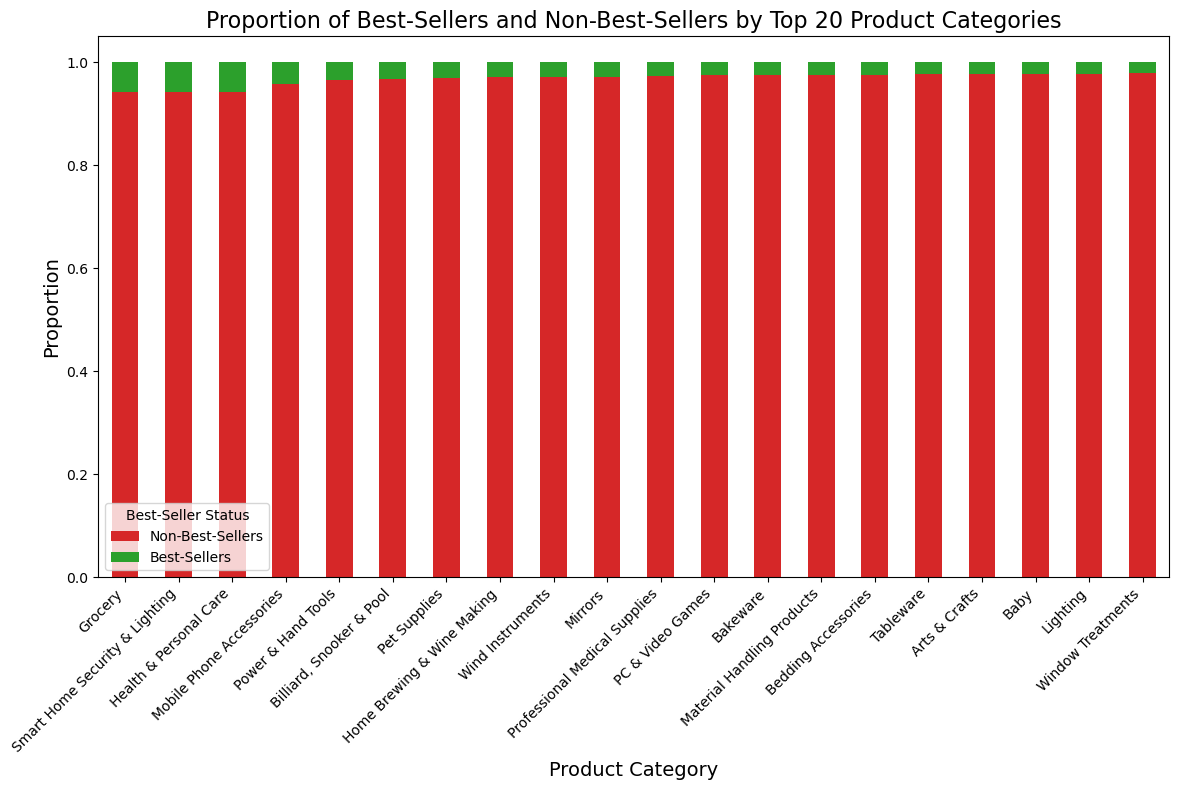

In [65]:
# Plotting the stacked bar chart for top 20 categories with the highest proportion of best-sellers
crosstab_top.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#d62728', '#2ca02c'])

# Adding labels and title
plt.title('Proportion of Best-Sellers and Non-Best-Sellers by Top 20 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Proportion', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding a legend
plt.legend(['Non-Best-Sellers', 'Best-Sellers'], title='Best-Seller Status')

# Display the plot
plt.tight_layout()
plt.show()

__Key Observations:__

- __Prevalence of Non-Best-Sellers:__ In all categories, the majority of products are non-best-sellers (red section). The proportion of best-sellers (green section) is relatively small across all categories, which matches the earlier analysis that only a small percentage of products become best-sellers in any given category.
- __Top Categories with Best-Sellers:__ Categories like Grocery, Smart Home Security & Lighting, and Health & Personal Care show a slightly larger green section, indicating that these categories have a higher proportion of best-sellers compared to others. Despite this, the green sections remain small, confirming that even in the most best-seller-dense categories, best-sellers only make up a small fraction of the total products.
- __Relative Uniformity:__ Across most categories, the proportion of best-sellers is similar, which aligns with the earlier Cramér’s V result that showed a weak to moderate association between category and best-seller status.

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands

__Objective:__ Investigate how different product categories influence product prices.

0. __Preliminary Step:__ Remove outliers in product prices.

* For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [71]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [73]:
# 1. Calculate Q1, Q3, and IQR

# Calculate the first quartile (Q1) and third quartile (Q3) for product prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")

Q1 (25th percentile): 9.99
Q3 (75th percentile): 45.99
IQR (Q3 - Q1): 36.0


In [75]:
# 2. Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Lower bound: -44.01
Upper bound: 99.99000000000001


In [77]:
# 3. Remove outliers from the dataset
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


1. __Violin Plots:__

* Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
* Which product category tends to have the highest median price? Don't filter here by top categories.

In [84]:
# Get the top 20 categories based on count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index

# Filter the dataframe to include only the top 20 categories
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]
df_top_20

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


/var/folders/t_/k5bhrc1x419crrfg_t8zp5nm0000gp/T/ipykernel_27792/2751251612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=df_top_20, palette='Set3')


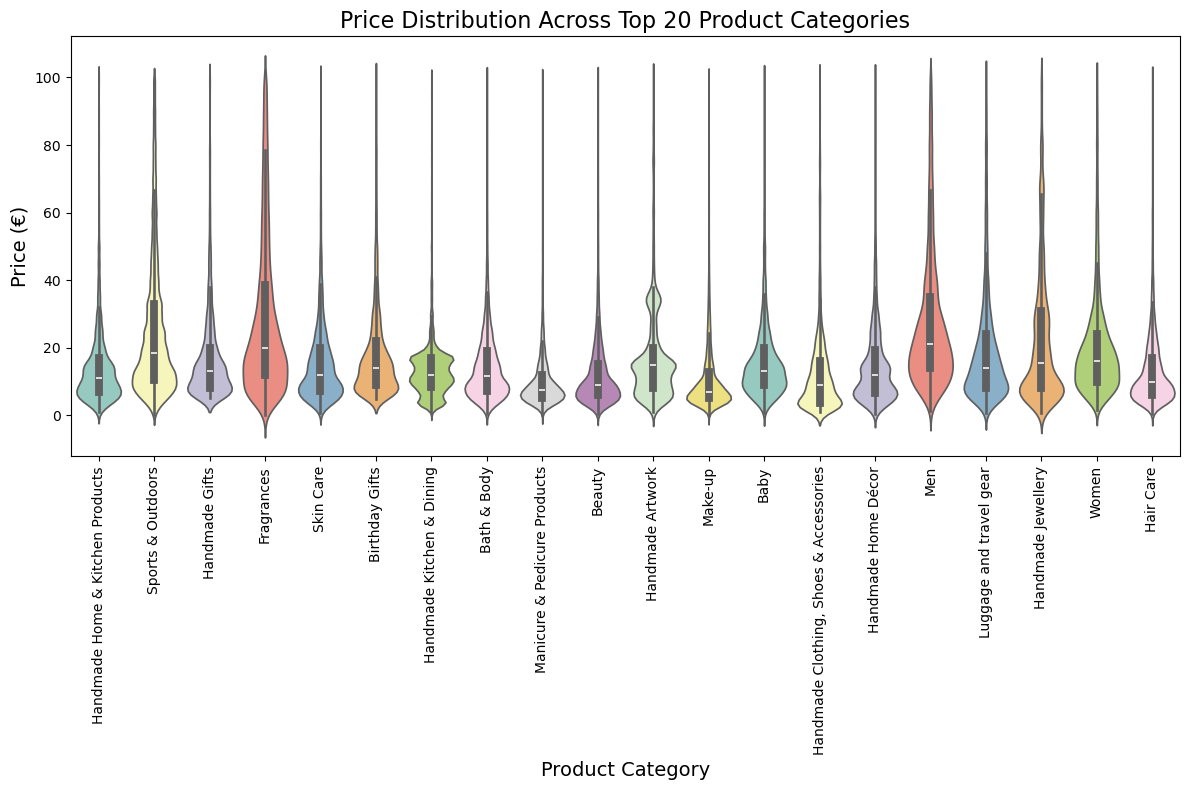

In [88]:
# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_20, palette='Set3')

# Add title and labels
plt.title('Price Distribution Across Top 20 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Price (€)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

__Interpretation of the Violin Plot:__
The violin plot shows the price distribution across the top 20 product categories:

- __Wide Price Range:__
    * Categories like _Fragrances_, _Men_, and _Sports & Outdoors_ have wider price distributions, suggesting more price variability and higher premium product options.
  
- __Tight Price Range:__
    * Categories like _Manicure & Pedicure_, and _Make-up_ have narrower distributions, indicating more consistent, lower-priced products.

- __Multiple Price Points:__
    * Fragrances and Men's products show multimodal distributions, with common price points at both low and high prices.

- __Median Prices:__
    * Categories like Fragrances and Men have higher medians, indicating higher-priced products on average, while categories like Hair Care and Handmade Gifts tend to be more affordable.

__Conclusion:__

Categories like _Fragrances_ and _Men_ offer a wide range of prices, while others like _Bath & Body_ show more consistent and affordable pricing.

* Which product category tends to have the highest median price? Don't filter here by top categories.

In [97]:
# Calculate the median price for each product category
median_prices = df_no_outliers.groupby('category')['price'].median()

# Sort the categories by median price in descending order
highest_median_price_category = median_prices.sort_values(ascending=False).head(1)

# Display the category with the highest median price
print(highest_median_price_category)

category
Desktop PCs    74.0
Name: price, dtype: float64


2. __Bar Charts:__

* Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
* Which product category commands the highest average price? Don't filter here by top categories.

In [109]:
# Step 1: Get the top 10 product categories based on count
top_10_categories = df_no_outliers['category'].value_counts().head(10).index

top_10_categories

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts'],
      dtype='object', name='category')

In [115]:
# Step 2: Filter the dataset for only the top 10 categories
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Step 3: Calculate the average price for each category
average_prices = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

average_prices

category
Sports & Outdoors                         25.172065
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Skin Care                                 15.654722
Bath & Body                               14.678683
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Name: price, dtype: float64

/var/folders/t_/k5bhrc1x419crrfg_t8zp5nm0000gp/T/ipykernel_27792/671745684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_prices.index, y=average_prices.values, palette="Set3")


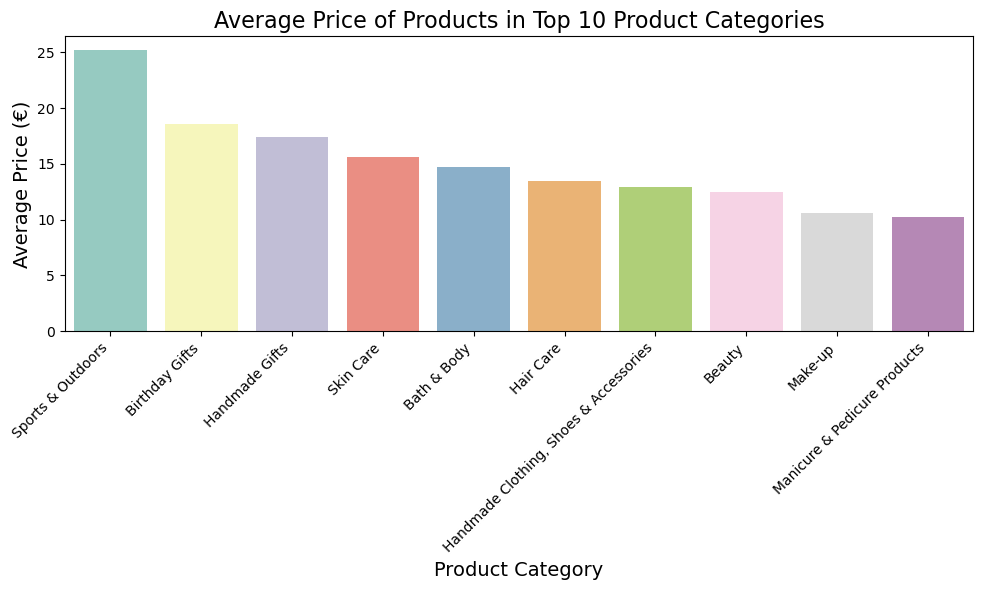

In [119]:
# Step 4: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices.index, y=average_prices.values, palette="Set3")

# Add labels and title
plt.title('Average Price of Products in Top 10 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Price (€)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

__Conclusion:__ Based on the bar chart, the product category that commands the highest average price is _Sports & Outdoors_, with an average price of approximately 25.

3. __Box Plots:__

* Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
* Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

/var/folders/t_/k5bhrc1x419crrfg_t8zp5nm0000gp/T/ipykernel_27792/761188161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top_10, palette="Set3")


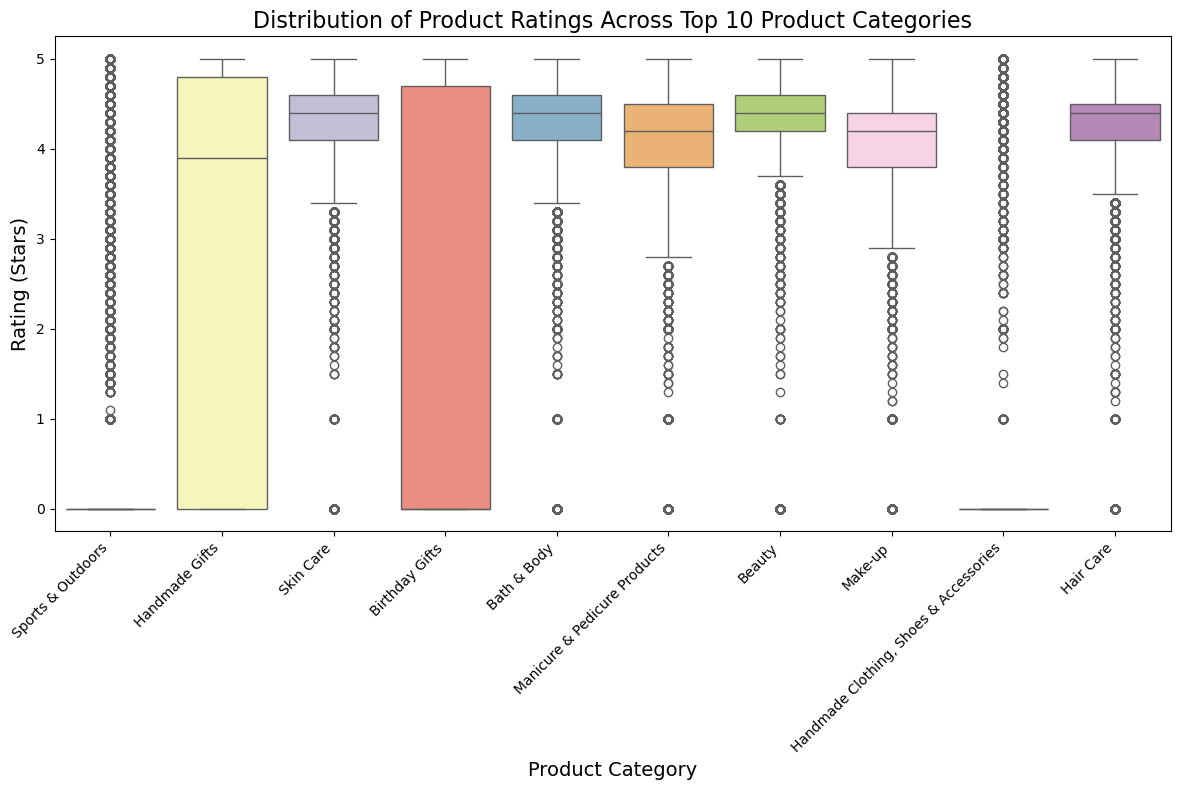

In [125]:
# Plot side-by-side box plots for product ratings
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_10, palette="Set3")

# Step 4: Add title and labels
plt.title('Distribution of Product Ratings Across Top 10 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Rating (Stars)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

- Based on the box plot, the category that tends to receive the highest median rating from customers is Birthday Gifts. The median rating (the line inside the box) is at 5 stars, indicating that products in this category frequently receive the highest possible rating from customers.
- Other categories like Handmade Gifts and Skin Care also have relatively high median ratings close to 5 stars, but Birthday Gifts clearly has the highest.
- Wide Range of Ratings: Categories such as Sports & Outdoors and Handmade Clothing, Shoes & Accessories show a wider range of ratings, with several products receiving lower ratings (down to 1 star or below). This suggests more varied customer satisfaction within these categories.

## Part 3: Investigating the Interplay Between Product Prices and Ratings